In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [3]:
%matplotlib notebook

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import dm_search


lc_i = likelihood_analyser.LikelihoodAnalyser()
DManalyzer = dm_search.DMAnalyser()

### AM data

In [6]:
filename = r'/home/data_transfer/data_from_windows/20191121/Bead1/AMdata/DMdata_20.h5'
bb = BeadDataFile.BeadDataFile(filename)
xx = bb.response_at_freq2('x',153, bandwidth=10)*50000
analytic_signal = signal.hilbert(xx)
amplitude_envelope = np.abs(analytic_signal)

xx3 = bb.response_at_freq3('x',153, bandwidth=10)/6
analytic_signal3 = signal.hilbert(xx3)
amplitude_envelope3 = np.abs(analytic_signal3)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


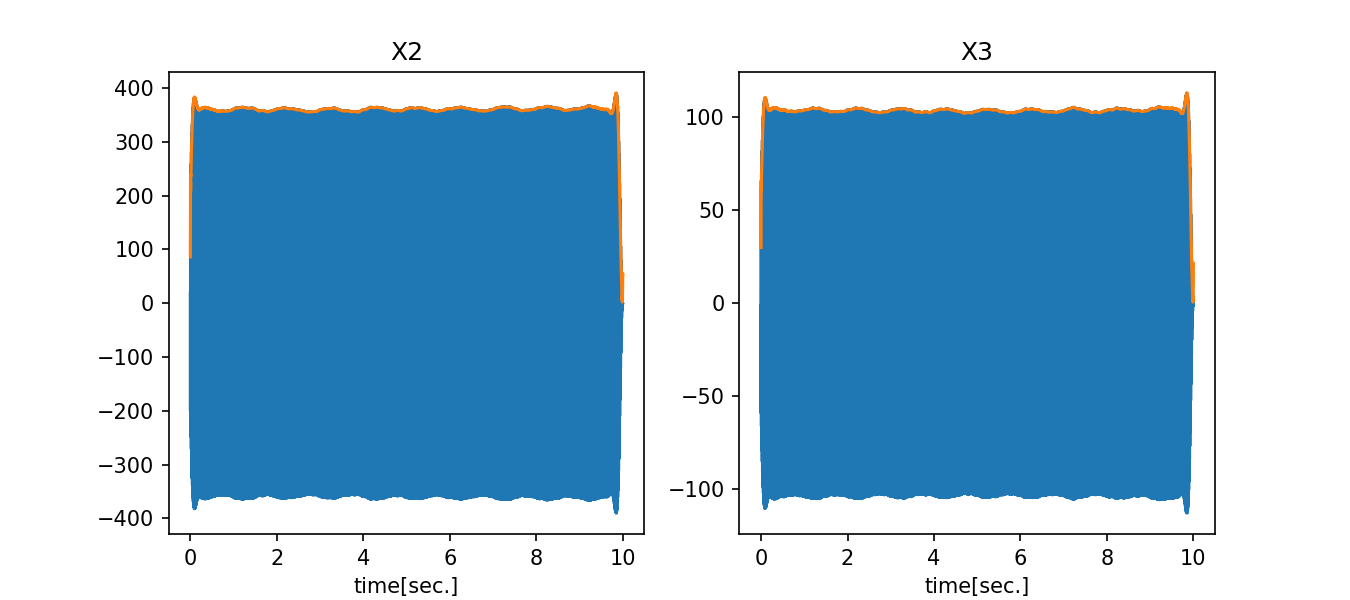

(25.869622022919977, 7.4197327958743875)

In [7]:
_,ax = plt.subplots(1,2,figsize=(9,4))
t = np.arange(50000)/5000
ax[0].plot(t, xx, label='signal')
ax[0].plot(t, amplitude_envelope, label='envelope')
ax[0].set(xlabel='time[sec.]', title='X2')

ax[1].plot(t, xx3, label='signal')
ax[1].plot(t, amplitude_envelope3, label='envelope')
ax[1].set(xlabel='time[sec.]', title='X3')

np.std(amplitude_envelope), np.std(amplitude_envelope3)

In [9]:
fnames = [r'/home/data_transfer/data_from_windows/20191121/Bead1/AMdata/DMdata_{}.h5'.format(i) for i in range(70, 80)]
DManalyzer.BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

In [11]:
DManalyzer.estimate_noise()

x2 noise rms:  1.7420127292502592
x3 noise rms:  1.2249497216296377


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


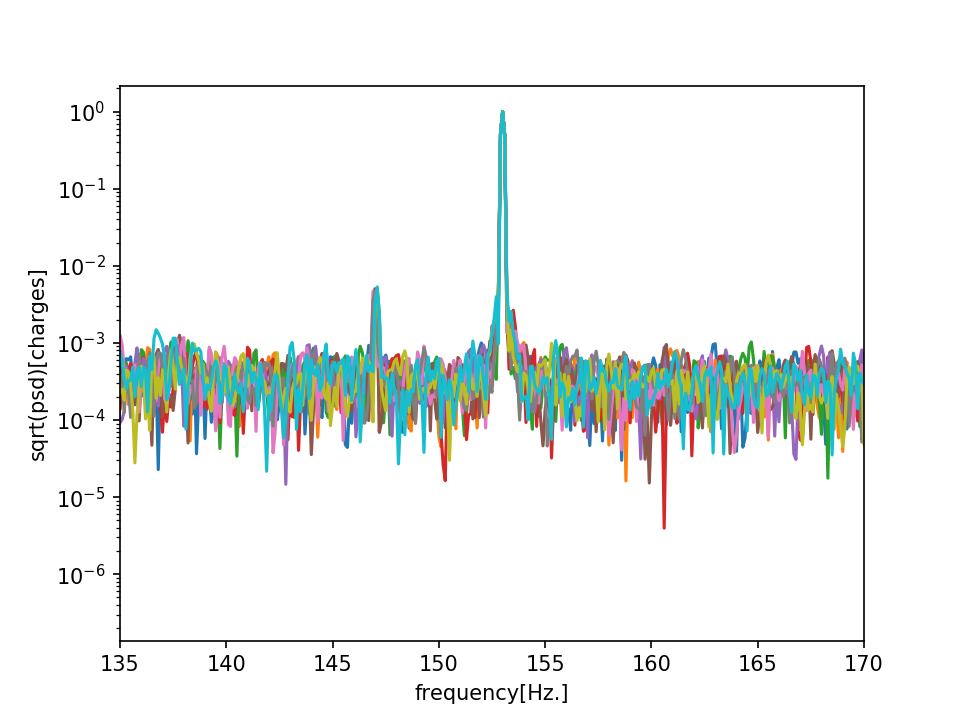

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (135, 170),
 Text(0.5, 0, 'frequency[Hz.]')]

In [12]:
_,ax = plt.subplots()
for bb in DManalyzer.BDFs:
    fft3, freq3 = matplotlib.mlab.psd(bb.x2,Fs=5000, detrend='linear', NFFT=50000)
    fft3 /= fft3[freq3==153]
    ax.semilogy(freq3, np.sqrt(fft3))
ax.set(xlim=(135,170), xlabel='frequency[Hz.]', ylabel='sqrt(psd)[charges]')

In [13]:
limit_1Hz = DManalyzer.get_sensitivity(alpha_frequency=1, bandwidth=10, frequency=153)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
bdf_i:  0 , AM frequency:  1
sensitivity:  1.38e-03
***************************************************
bdf_i:  1 , AM frequency:  1
sensitivity:  1.92e-03
***************************************************
bdf_i:  2 , AM frequency:  1
sensitivity:  1.39e-03
***************************************************
bdf_i:  3 , AM frequency:  1
sensitivity:  1.21e-03
***************************************************
bdf_i:  4 , AM frequency:  1
sensitivity:  3.41e-04
***************************************************
bdf_i:  5 , AM frequency:  1
sensitivity:  9.83e-04
***************************************************
bdf_i:  6 , AM frequency:  1
sensitivity:  1.09e-03
***************************************************
bdf_i:  7 , AM frequency:  1
sensitivity:  1.47e-04
***************************************************
bdf_i:  8 , AM frequency:  1
sensitivity:  1.14e-03
***************************************************
bdf_i:  9 , 

### Linearity

In [14]:
fnames = [r'/home/data_transfer/data_from_windows/20191121/Bead1/Linearity/DMdata_{}.h5'.format(i) for i in range(100)]
bdfs = [BeadDataFile.BeadDataFile(fname_) for fname_ in fnames]

In [15]:
bb = bdfs[0]
resp2 = [np.std(bb.response_at_freq2('x', drive_freq=153)) for bb in bdfs]
resp3 = [np.std(bb.response_at_freq3('x', drive_freq=153)) for bb in bdfs]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


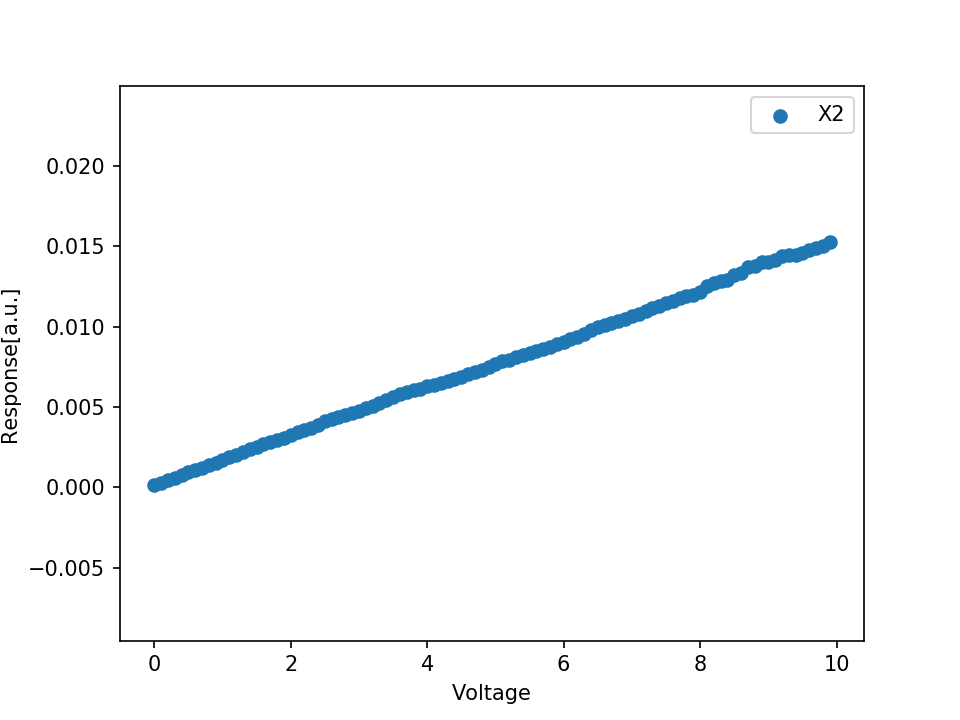

In [19]:
_,ax = plt.subplots()
ax.scatter(np.arange(len(resp2))/10,resp2, label='X2',)
# ax.scatter(np.arange(len(resp2))/10,resp3, label='X3')
ax.set(xlabel='Voltage', ylabel='Response[a.u.]')
ax.legend()

### 20191130

<IPython.core.display.Javascript object>


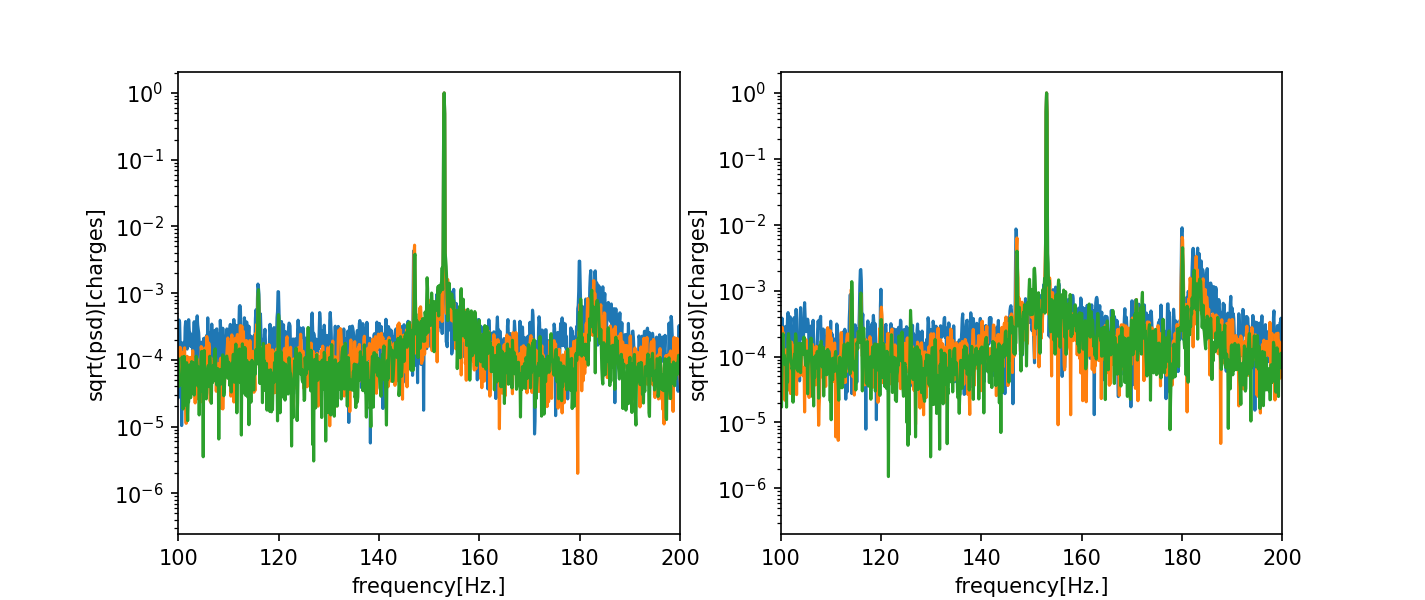

[Text(0, 0.5, 'sqrt(psd)[charges]'),
 (100, 200),
 Text(0.5, 0, 'frequency[Hz.]')]